<a href="https://colab.research.google.com/github/faisaladisoe/image-processing-lab/blob/master/Lab%206/source%20code/Lab6_1906293184_MuhammadFaisalAdiSoesatyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [102]:
import os
import cv2 as cv
import numpy as np
import statistics as stats
from skimage import color, io
from matplotlib import pyplot as plt

# Image Histogram

## Classification Logic

### Import images

In [103]:
emerald_image_1 = io.imread('./images/Histogram/emerald/emerald1.jpg')
ruby_image_1 = io.imread('./images/Histogram/ruby/ruby1.jpg')

### Show histogram of emerald and ruby

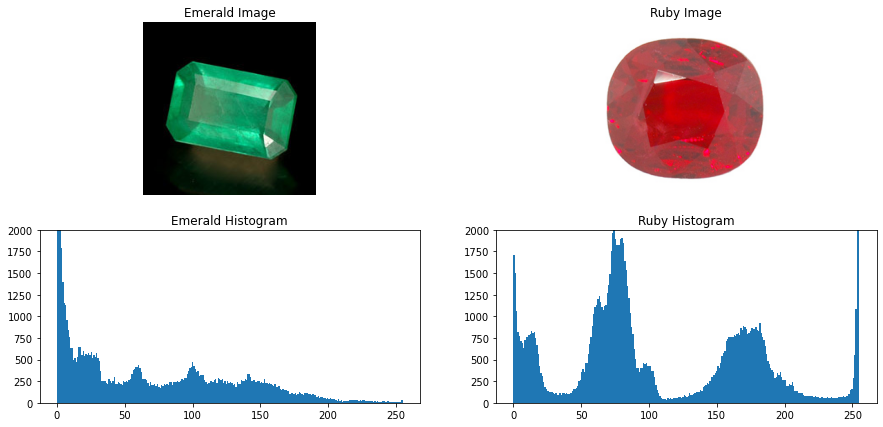

In [104]:
# Show image
plt.figure(figsize=(15,7))
plt.subplot(2, 2, 1)
plt.title('Emerald Image')
plt.imshow(emerald_image_1)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title('Ruby Image')
plt.imshow(ruby_image_1)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Emerald Histogram')
plt.hist(emerald_image_1.flatten(), 256, range=(0,255))
plt.ylim([0, 2e3]); #plt.axis('off')
plt.subplot(2, 2, 4)
plt.title('Ruby Histogram')
plt.hist(ruby_image_1.flatten(), 256, range=(0,255))
plt.ylim([0, 2e3]); #plt.axis('off')

plt.show()

### Prediction

In [105]:
def predict(file_name):
  img = io.imread(file_name)
  frequency_count = np.bincount(img.flatten())
  cum_sum = np.cumsum(frequency_count)

  mean_50_100 = stats.mean(frequency_count[50:100])
  mean_150_200 = stats.mean(frequency_count[150:200])
  if stats.mean(frequency_count[50:200]) >= 750:
    return 'emerald'
  elif mean_50_100 >= 750 or mean_150_200 >= 500:
    return 'ruby'
  else:
    return 'emerald'

### Execution

In [106]:
folders = ['emerald', 'ruby']
for folder in folders:
  for filename in os.listdir(f'./images/Histogram/{folder}'):
    abs_path_folder = f'./images/Histogram/{folder}'
    filename = f'{abs_path_folder}/{filename}'
    print(f'image {filename} predicted as {predict(filename)}')

image ./images/Histogram/emerald/emerald2.jpg predicted as emerald
image ./images/Histogram/emerald/emerald4.jpg predicted as emerald
image ./images/Histogram/emerald/emerald3.jpg predicted as emerald
image ./images/Histogram/emerald/emerald1.jpg predicted as emerald
image ./images/Histogram/ruby/ruby3.jpg predicted as emerald
image ./images/Histogram/ruby/ruby4.jpg predicted as ruby
image ./images/Histogram/ruby/ruby1.jpg predicted as ruby
image ./images/Histogram/ruby/ruby2.jpg predicted as ruby


## Explanation

Pada nomor 1 saya memilih menggunakan rata-rata dari rentang frekuensi tertentu. Dalam hal ini rata-rata frekuensi dari rentang 50 hingga 100 serta rentang 150 hingga 200. 

Saya memilih rentang tersebut karena terdapat kecenderungan sebagai berikut


*   Benda Emerald, memiliki dua buah kecenderungan entah itu tersebar merata dalam frekuensi yang rendah atau tinggi. Kedua kasus tersebut terdapat pada masalah ini. Dideteksi terdapat dua buah image emerald dengan persebaran frekuensi tinggi juga rendah. Namun keempatnya memiliki satu kesamaan, yakni tersebar di rentang yang lebar. Dalam kasus ini 50 hingga 200. Dari hasil pengamatan berikut, disimpulkan bahwa apabila terdapat persebarang frekuensi berjumlah tinggi pada rentang 50 hingga 200 atau frekuensi rendah kurang dari 500 maka dapat dideteksi sebagai benda emerald.
*   Benda Ruby, memiliki karakterisik unik yakni kemunculan frekuensi tinggi hanya ada pada rentang-rentang tertentu. Kemunculan frekuensi tinggi tersebut terlihat seolah-olah seperti impuls (muncul mendadak kemudian melandai kembali). Dalam kasus ini frekuensi tinggi muncul pada rentang 50 hingga 100 serta 150 hingga 200. Terdapat satu buah outlier, yakni frekuensi tinggi pada rentang 20 hingga 70. Dengan demikian kasus dapat ditangani bahwa apabila pada rentang 50 hingga 100 dan 150 hingga 200 rata-rata frekuensi yang muncul masing-masing di atas 750 dan 500 maka dapat digolongkan sebagai benda ruby.

Dari method di atas, maka metric recall yang saya peroleh adalah 87.5% dengan 1 kesalahan pada image ruby nomor 3.



# Hough Transform

## Classify the result of Hough Transform

### Import images

In [107]:
square_img = io.imread('./images/Hough/square/square4.jpg')
# square_img = io.imread('./images/Hough/triangle/triangle1.jpg')
ori_sq_img = np.copy(square_img)

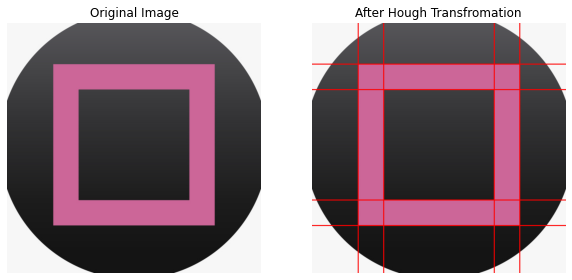

In [108]:
gray_img = (color.rgb2gray(square_img) * 255).astype(np.uint8)

edges = cv.Canny(gray_img, 50, 150, apertureSize=3)
lines = cv.HoughLines(edges, 1, np.pi/180, 200)

# plotting line
for line in lines:
  for rho,theta in line:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(square_img, (x1,y1), (x2,y2), (255,0,0), 2)

# Show image
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(ori_sq_img)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('After Hough Transfromation')
plt.imshow(square_img,)
plt.axis('off')
plt.show()

### Hough Method

In [109]:
def hough_compute(img):
  img = io.imread(img)
  ori_img = np.copy(img)
  gray_img = (color.rgb2gray(img) * 255).astype(np.uint8)

  edges = cv.Canny(gray_img, 50, 150, apertureSize=3)
  lines = cv.HoughLines(edges, 1, np.pi/180, 200)
  return edges, lines

### Hough Computation

In [110]:
folders = ['square', 'triangle']
for folder in folders:
  for filename in os.listdir(f'./images/Hough/{folder}'):
    abs_path_folder = f'./images/Hough/{folder}'
    filename = f'{abs_path_folder}/{filename}'
    _, lines = hough_compute(filename)
    result = ''
    if len(lines) >= 8 or len(lines) == 4:
      result = 'square'
    else:
      result = 'triangle'
    print(f'image {filename} predicted as {result}')

image ./images/Hough/square/square4.jpg predicted as square
image ./images/Hough/square/square2.jpg predicted as square
image ./images/Hough/square/square1.jpg predicted as square
image ./images/Hough/square/square3.jpg predicted as square
image ./images/Hough/triangle/triangle1.jpg predicted as triangle
image ./images/Hough/triangle/triangle3.jpg predicted as triangle
image ./images/Hough/triangle/triangle4.jpg predicted as triangle
image ./images/Hough/triangle/triangle2.jpg predicted as triangle


## Explanation

Saya melihat pola yang terdapat pada citra square dan triangle. Masing-masing memiliki ciri khasnya sendiri. Pada citra square, dapat dijamin bahwa jumlah sisi yang terdefinisi adalah 4, terlepas dari inner side ataupun outer sidenya. Juga pada citra triangle, dapat dijamin bahwa jumlah sisi yang terdefinisi adalah 3, terlepas pula dari inner side ataupun outersidenya.

Dari pola yang terdapat pada data, masing-masing citra memiliki inner dan outer side. Dengan demikian, maximum jumlah garis yang terdeteksi melalui Hough Transform (lines) dapat dihitung pula. Pada citra, 

1.   Square. Maksimum jumlah garis yang terdeteksi, baik pada inner maupun outer sidenya adalah 8 garis.
2.   Triangle. Maksimum jumlah garis yang terdeteksi, baik pada inner maupun outer sidenya adalah 6 garis.

Masalah muncul ketika terdapat image yang proses line detectionnya kurang sempurna. Hal ini dapat menyulitkan pembentukkan condition yang memungkinkan klasifikasi berlangsung. Namun terkait issue ini, saya memberi satu kondisi tambahan yakni, mengembalikan ke konsep dasar bangun datar. Square memiliki tepat 4 sisi dan triangle memiliki tepat 3 sisi. Dengan demikian, issue sebelumnya dapat ditangani.

Besaran metric Recall yang didapatkan pada komputasi sebelumnya adalah 100%. Dengan kata lain, algoritma dapat mendeteksi image bangun datar dengan baik.



# Template Matching

## Result of template matching

### Template Matching Method

In [111]:
def template_matching_method(base_image, thresh):
  base_img = cv.cvtColor(cv.imread(f'./images/Template Matching/{base_image}'), cv.COLOR_BGR2RGB)
  template_img = cv.cvtColor(cv.imread('./images/Template Matching/ball.jpg'), cv.COLOR_BGR2RGB)

  gray_base = cv.cvtColor(base_img, cv.COLOR_RGB2GRAY)
  gray_template = cv.cvtColor(template_img, cv.COLOR_RGB2GRAY)

  # store the height and weight
  w, h = gray_template.shape[::-1]

  # do template matching
  res = cv.matchTemplate(gray_base, gray_template, cv.TM_CCOEFF_NORMED)

  # record the coordinate
  min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

  template_matched = base_img.copy()

  # assign threshold
  loc = np.where(res >= thresh)

  return base_img, template_img, template_matched, loc, w, h

### Template Matching of 3-pointer and ball

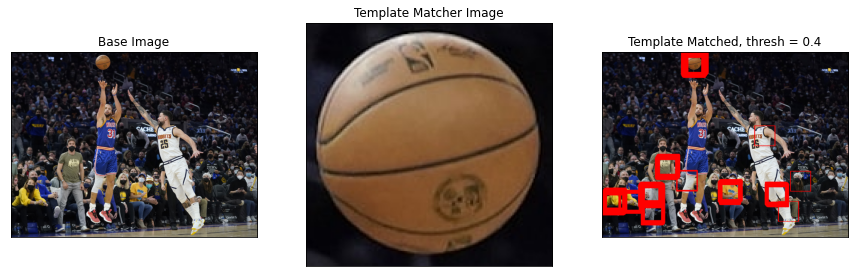

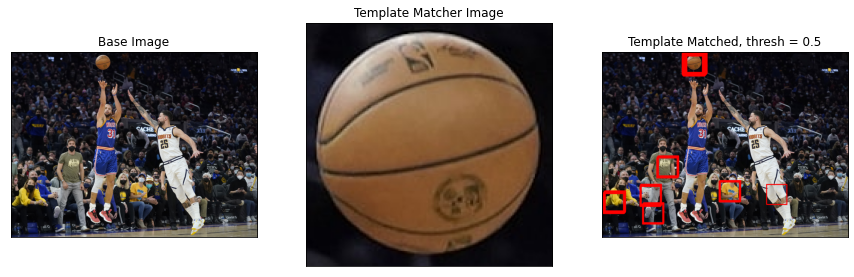

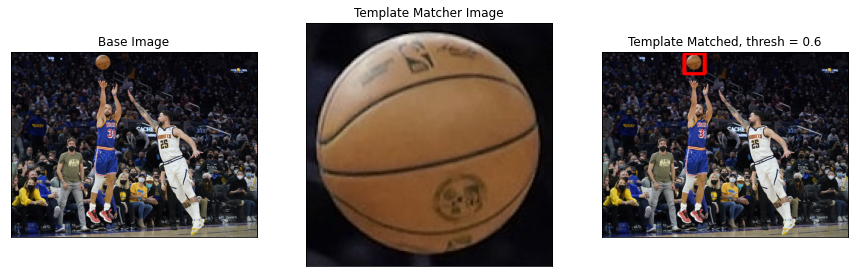

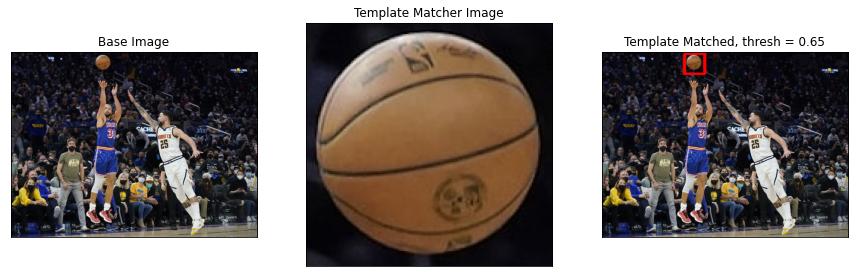

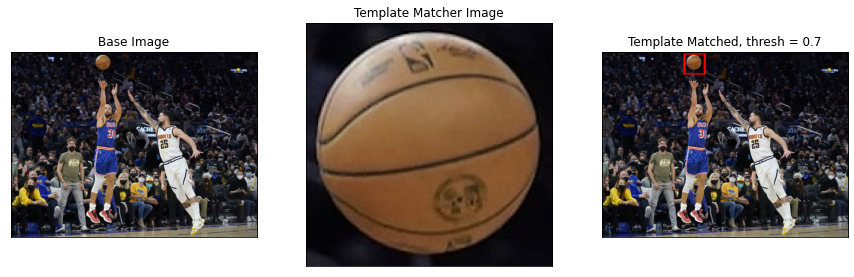

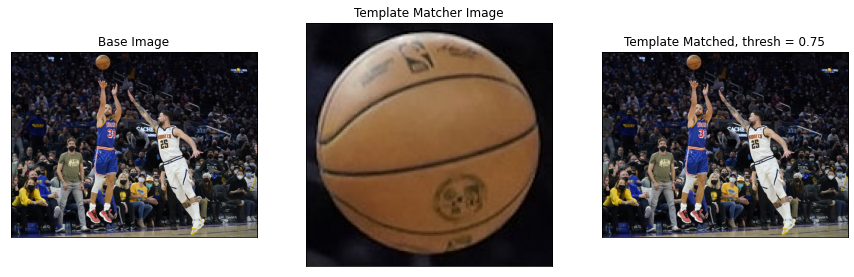

In [112]:
thresholds = [.4, .5, .6, .65, .7, .75]
for thresh in thresholds:
  base_img, template_img, template_matched, loc, w, h = template_matching_method('3-pointer.jpg', thresh)
  for point in zip(*loc[::-1]):
    cv.rectangle(template_matched, point, (point[0] + w, point[1]+ h), (255,0,0), 2)

  plt.figure(figsize=(15, 7))
  plt.subplot(1, 3, 1),plt.imshow(base_img)
  plt.title('Base Image'), plt.xticks([]),plt.yticks([])
  plt.subplot(1, 3, 2),plt.imshow(template_img)
  plt.title('Template Matcher Image'), plt.xticks([]),plt.yticks([])
  plt.subplot(1, 3, 3),plt.imshow(template_matched)
  plt.title(f'Template Matched, thresh = {thresh}'), plt.xticks([]),plt.yticks([])
  plt.show()

### Template Matching of dunk and ball

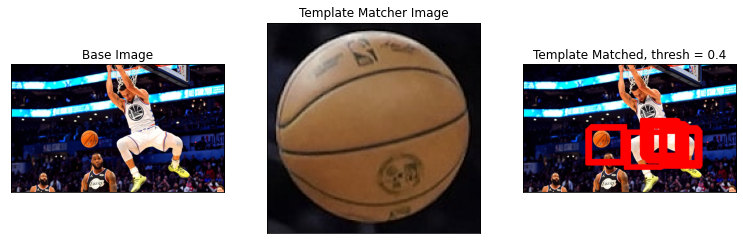

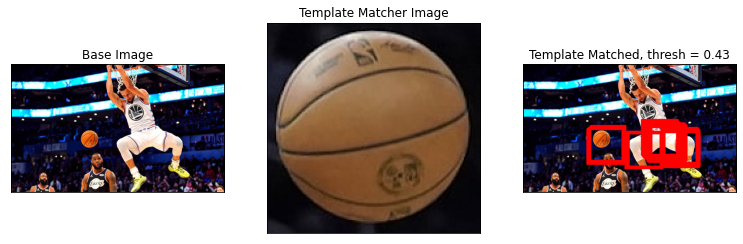

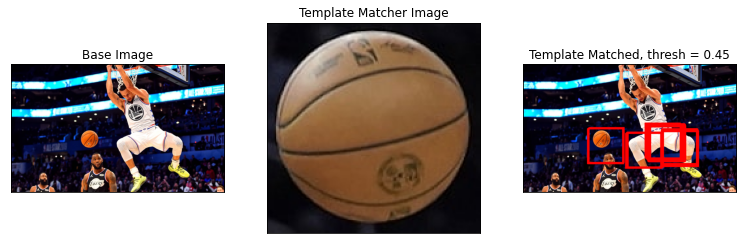

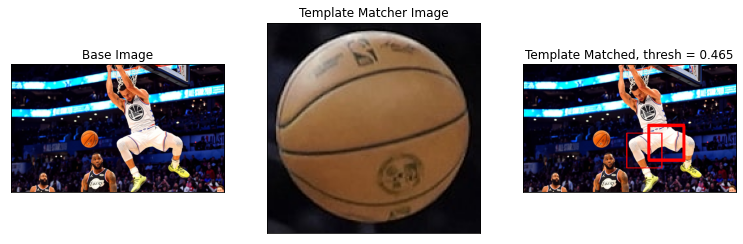

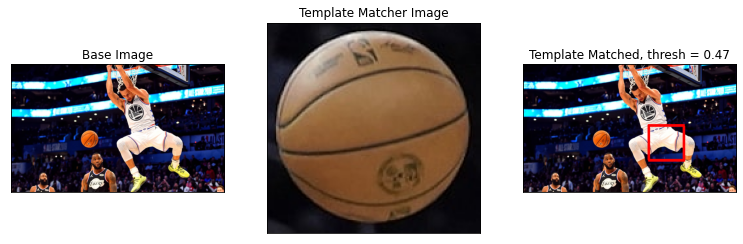

In [113]:
thresholds = [.4, .43, .45, .465, .47]
for thresh in thresholds:
  base_img, template_img, template_matched, loc, w, h = template_matching_method('dunk.jpg', thresh)
  for point in zip(*loc[::-1]):
    cv.rectangle(template_matched, point, (point[0] + w, point[1]+ h), (255,0,0), 2)

  plt.figure(figsize=(13, 7))
  plt.subplot(1, 3, 1),plt.imshow(base_img)
  plt.title('Base Image'), plt.xticks([]),plt.yticks([])
  plt.subplot(1, 3, 2),plt.imshow(template_img)
  plt.title('Template Matcher Image'), plt.xticks([]),plt.yticks([])
  plt.subplot(1, 3, 3),plt.imshow(template_matched)
  plt.title(f'Template Matched, thresh = {thresh}'), plt.xticks([]),plt.yticks([])
  plt.show()

## Difference

Terdapat dua bahasan pada kasus ini, yakni terkait image 3-pointer dan dunk.


1.   Image 3-pointer. Pada image 3-pointer berhasil ditangkap bagian yang ingin diterapkan matching, yakni pada bola basketnya. Bagian citra yang berhasil ditangkap menggunakan template matcher image dimulai dengan threshold .6 hingga berakhir di threshold .7; ketika threshold sudah menyentuh .75 bola basket sudah tidak tertangkap lagi. Sedangkan ketika threshold berada di nilai .5 posisi citra/kotak mendeteksi sangat banyak objek.
2.   Image dunk. Pada image dunk tidak ada bagian citra yang berhasil ditangkap berdasarkan referensi dari template matcher dari berbagai threshold. Sistem tidak berhasil mendeteksi bagian yang diharapkan. Pada nilai threshold .4 sistem mendeteksi cukup banyak objek (ditandai dengan kehadiran kotak merah). Sedangkan ketika threshold bernilai .47 sistem justru mendeteksi pangkal paha si pebasket bukan pada bola basketnya.

Kedua fenomena di atas terjadi karena template matcher yang dijadikan reference image merupakan image yang cukup mirip atau bahkan bagian dari image pada citra 3-pointer. Hal ini yang menyebabkan pada citra 3-pointer sistem berhasil mendeteksi bagian yang diharapkan sedangkan pada citra dunk sistem tidak berhasil mendeteksi. Saya berasumsi, algoritma ini memang dikhususkan menyocokkan bagian yang setidaknya >75% mirip dengan citra yang ingin diuji. Apabila citra yang ingin diuji cukup jauh berbeda, perlu diterapkan suatu mekanisme Machine Learning agar mesin dapat memelajari berbagai macam jenis bola basket yang berbeda. Dengan demikian bola basket pada image dunk dapat terdeteksi.



## Benefit & Drawback

**Benefit**

1.   Apabila reference image persentasi kemiripan dengan salah satu objek/bagian pada image yang ingin diuji roughly diatas 75%, maka sistem dapat mendeteksi objek tersebut. Tentu dengan threshold yang disesuaikan
2.   Apabla kebutuhan sudah terdefinisi dengan jelas serta spesifik, maka mekanisme ini dapat digunakan. Mengingat cukup lakukan operasi saja tidak perlu proses training model untuk memahami berbagai jenis objek/bagian.
3.   Penggunaan method cukup straighforward, cocok dan sesuai untuk mereka yang sudah cukup mahir, baik dari sisi penentuan threshold, pemilihan reference image serta image targetnya.

**Drawback**

1.   Perlu kalkulasi serta kalibrasi threshold yang baik agar dapat sesuai dengan bermacam image serta reference. Terkadang threshold yang tinggi pada suatu image dapat bertindak berbeda pada image lainnya. Diperlukan uji empiris pada data yang besar untuk mendapatkan nilai threshold yang mutakhir.
2.   Apabila yang menjadi reference image bukan merupakan bagian/objek pada image yang ingin diuji, maka sistem tidak dapat mendeteksinya.
3.   Diperlukan proses pengembangan model Machine Learning untuk memastikan sistem/model yang dapat mendeteksi beragam objek tanpa harus objek tersebut menjadi bagian dari image yang ingin diuji.

Penggunaan template matching kurang sesuai untuk bola pada pertandingan basket. Hal ini dikarenakan penggunaan bola pada tiap pertandingan basket tentu berbeda serta bervariasi. Diperlukan reference image yang beragam agar dapat bekerja dengan baik. Namun apabila diasumsikan bola yang digunakan pada pertandingan merupakan bola yang sama atau >75% mirip dengan reference image, maka hal ini bisa bekerja/sesuai.
